In [172]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [173]:
pd.set_option('display.max_columns',None)

In [174]:
df = pd.read_csv('Gurgaon_properties_cleaned_v2.csv')

In [175]:
df.drop(columns='Unnamed: 0',inplace=True)

In [176]:
df.head()

property_type                  society      sector  price  price_per_sqft  \
0          flat          eldeco accolade  sohna road   0.73          5752.0   
1          flat        dlf regal gardens   sector 90   1.29          9020.0   
2          flat            m3m woodshire  sector 107   0.75          5490.0   
3          flat  adani m2k oyster grande  sector 102   2.50          7817.0   
4          flat            pyramid urban  sector 67a   0.60          8571.0   

     area                                       areaWithType  bedRoom  \
0  1269.0             Super Built up area 1269(117.89 sq.m.)        2   
1  1430.0  Super Built up area 1702(158.12 sq.m.)Built Up...        3   
2  1366.0  Super Built up area 1366(126.91 sq.m.)Carpet a...        2   
3  3198.0  Super Built up area 3198(297.1 sq.m.)Built Up ...        4   
4   700.0               Super Built up area 700(65.03 sq.m.)        2   

   bathroom balcony  floorNum      facing   agePossession  \
0         2       3       9.0  North-East  Relatively New   
1         3       3       7.0        East  Relatively New   
2         2      3+      14.0        West  Relatively New   
3         5      3+      10.0  North-East  Relatively New   
4         2       2      14.0         NaN    New Property   

   super_built_up_area  built_up_area  carpet_area  servant room  pooja room  \
0               1269.0            NaN          NaN             0           1   
1               1702.0         1540.0       1430.0             0           0   
2               1366.0            NaN       1050.0             0           1   
3               3198.0         2600.0       2350.0             1           1   
4                700.0            NaN          NaN             0           0   

   study room  others  store room  furnishing_type  luxury_score  
0           0       0           0                0           133  
1           1       0           0                0           224  
2           0       0           0                0           228  
3           0       0           0                1           228  
4           0       0           0                0            19

In [177]:
df = df.drop_duplicates()

In [178]:
df.shape

(3677, 23)

In [179]:
df.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft', 'area',
       'areaWithType', 'bedRoom', 'bathroom', 'balcony', 'floorNum', 'facing',
       'agePossession', 'super_built_up_area', 'built_up_area', 'carpet_area',
       'servant room', 'pooja room', 'study room', 'others', 'store room',
       'furnishing_type', 'luxury_score'],
      dtype='object')

### Price

<AxesSubplot:xlabel='price', ylabel='Count'>

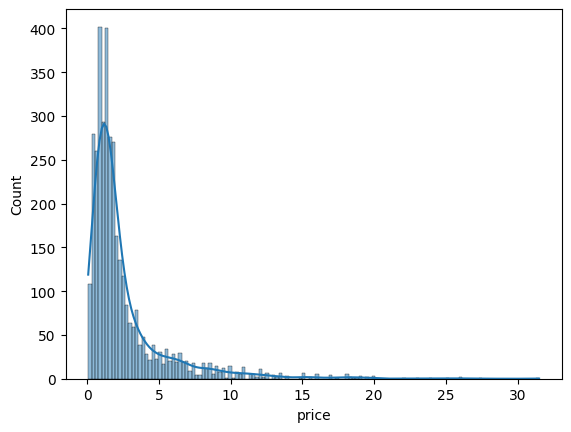

In [180]:
sns.histplot(df['price'],kde=True)

<AxesSubplot:xlabel='price'>

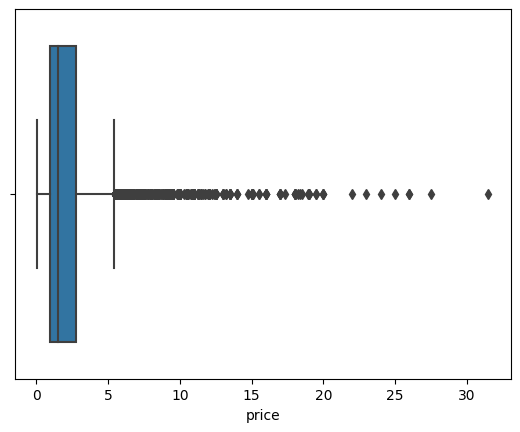

In [181]:
sns.boxplot(x=df['price'])

In [182]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

IQR = Q3-Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

outlier = df[(df['price']<lower) | (df['price']>upper)]

In [183]:
outlier.sort_values('price',ascending=False)

property_type                                            society  \
1484         house  arjun marg/ sector- 26 phase- 1/ golf course road   
133          house                                        independent   
1215         house                                     dlf city plots   
617          house                                        independent   
2606         house                                   suncity township   
...            ...                                                ...   
1456         house                               housing board colony   
280           flat                                  mahindra luminare   
2616         house                                        independent   
673           flat                                experion windchants   
2908         house                                  ansal api esencia   

               sector  price  price_per_sqft     area  \
1484        sector 26  31.50         35000.0   9000.0   
133         sector 43  27.50         24366.0  11286.0   
1215        sector 26  26.00         57206.0   4545.0   
617         sector 26  26.00         82540.0   3150.0   
2606        sector 54  25.00         31111.0   8036.0   
...               ...    ...             ...      ...   
1456        sector 28   5.50         30556.0   1800.0   
280         sector 59   5.50         18181.0   3025.0   
2616  sohna road road   5.50          5093.0  10799.0   
673        sector 112   5.49         11584.0   4739.0   
2908        sector 67   5.46         24170.0   2259.0   

                                           areaWithType  bedRoom  bathroom  \
1484                       Plot area 1000(836.13 sq.m.)        7         9   
133                        Plot area 1254(1048.5 sq.m.)        6         7   
1215                        Plot area 505(422.24 sq.m.)        6         7   
617   Plot area 402(336.12 sq.m.)Built Up area: 400 ...       16        16   
2606                       Plot area 1000(836.13 sq.m.)        4         4   
...                                                 ...      ...       ...   
1456                        Plot area 200(167.23 sq.m.)        4         3   
280              Super Built up area 3025(281.03 sq.m.)        3         3   
2616  Plot area 1200(1003.35 sq.m.)Built Up area: 35...        3         3   
673   Super Built up area 4739(440.27 sq.m.)Built Up...        4         5   
2908                        Plot area 251(209.87 sq.m.)        4         5   

     balcony  floorNum      facing       agePossession  super_built_up_area  \
1484      3+       3.0  North-East      Moderately Old                  NaN   
133       3+       3.0  North-East      Relatively New                  NaN   
1215      3+       2.0  North-East        New Property                  NaN   
617       3+       4.0  North-West        New Property                  NaN   
2606      3+       2.0       North      Moderately Old                  NaN   
...      ...       ...         ...                 ...                  ...   
1456       3       2.0       North        Old Property                  NaN   
280        1      26.0         NaN  Under Construction               3025.0   
2616      3+       2.0        West      Moderately Old                  NaN   
673       3+       5.0       South      Relatively New               4739.0   
2908      3+       2.0        East      Relatively New                  NaN   

      built_up_area  carpet_area  servant room  pooja room  study room  \
1484        9000.00          NaN             1           1           1   
133        11286.00          NaN             1           1           1   
1215        4545.00          NaN             1           1           1   
617          400.00        350.0             1           1           1   
2606        1000.00          NaN             1           1           1   
...             ...          ...           ...         ...         ...   
1456        1800.00          NaN       

In [184]:
df.to_csv('outliers.csv',index=False)

### Price per sqft

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

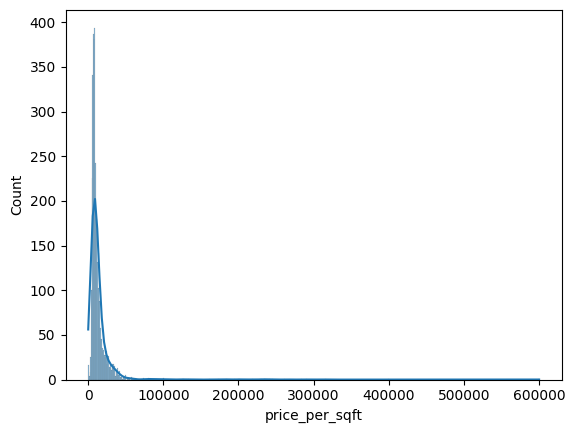

In [185]:
sns.histplot(df['price_per_sqft'],kde=True)

<AxesSubplot:xlabel='price_per_sqft'>

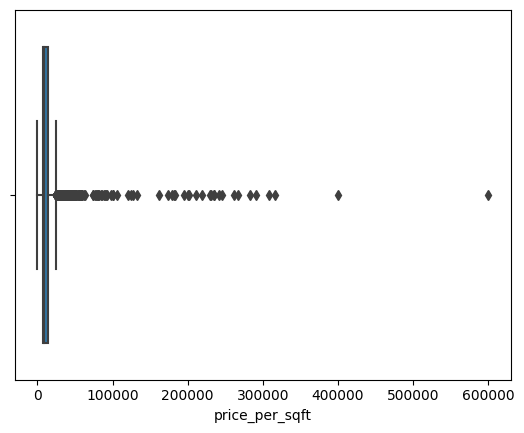

In [186]:
sns.boxplot(x=df['price_per_sqft'])

In [187]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

IQR = Q3-Q1

lower = Q1-1.5*IQR
upper = Q3+1.5*IQR

outlier_sqft = df[(df['price_per_sqft']<lower) | (df['price_per_sqft']>upper)]

In [188]:
outlier_sqft.shape

(354, 23)

In [189]:
outlier_sqft

property_type                       society     sector  price  \
7            house                   independent  sector 25   6.50   
10            flat                dlf park place  sector 54   4.85   
44           house                   independent  sector 17   3.50   
45           house   unitech nirvana birch court  sector 50   6.80   
52           house  project housing board colony  sector 31   8.00   
...            ...                           ...        ...    ...   
3769          flat                dlf park place  sector 54   4.85   
3770         house                   independent  sector 24  10.00   
3779         house                unitech espace  sector 50   7.50   
3794         house                unitech espace  sector 50  10.45   
3797         house                   independent  sector 26  20.00   

      price_per_sqft    area  \
7            36111.0  1800.0   
10           30180.0  1607.0   
44          218750.0   160.0   
45           31481.0  2160.0   
52           63492.0  1260.0   
...              ...     ...   
3769         25866.0  1875.0   
3770        229885.0   435.0   
3779         34722.0  2160.0   
3794         32253.0  3240.0   
3797         44444.0  4500.0   

                                           areaWithType  bedRoom  bathroom  \
7                           Plot area 200(167.23 sq.m.)        4         4   
10    Super Built up area 1983(184.23 sq.m.)Built Up...        3         4   
44                     Built Up area: 160 (14.86 sq.m.)        6         6   
45                          Plot area 240(200.67 sq.m.)        4         4   
52                    Built Up area: 140 (117.06 sq.m.)        2         1   
...                                                 ...      ...       ...   
3769             Super Built up area 1875(174.19 sq.m.)        3         4   
3770                     Carpet area: 435 (40.41 sq.m.)        8        10   
3779  Plot area 240(200.67 sq.m.)Built Up area: 241 ...        3         3   
3794                        Plot area 360(301.01 sq.m.)        5         7   
3797                        Plot area 500(418.06 sq.m.)        5         7   

     balcony  floorNum      facing   agePossession  super_built_up_area  \
7         3+       2.0  North-East  Moderately Old                  NaN   
10        3+       6.0       North  Moderately Old               1983.0   
44        3+       3.0  North-West       Undefined                  NaN   
45        3+       2.0  South-East    Old Property                  NaN   
52         0       1.0         NaN       Undefined                  NaN   
...      ...       ...         ...             ...                  ...   
3769      3+      25.0  South-East  Relatively New               1875.0   
3770      3+       1.0        West       Undefined                  NaN   
3779       2       2.0        West  Moderately Old                  NaN   
3794      3+       3.0         NaN  Moderately Old                  NaN   
3797      3+       3.0        West  Relatively New                  NaN   

      built_up_area  carpet_area  servant room  pooja room  study room  \
7            1800.0          NaN             1           1           1   
10           1785.0       1607.0             1           0           0   
44            160.0          NaN             0           0           0   
45           2160.0          NaN             1           1           1   
52            140.0          NaN             0           0           0   
...             ...          ...           ...         ...         ...   
3769            NaN          NaN             1           0           0   
3770            NaN        435.0             0           0           0   
3779          241.0        240.0             1           0           0   
3794         3240.0          NaN             1           1           1   
3797         4500.0          NaN             1           1           0   

      others  store room  furnishing_type  luxury_sc

In [190]:
df.to_csv('outlier_sqft.csv',index=False)

In [191]:
outlier_sqft['area'] = outlier_sqft['area'].apply(lambda x:x*9 if x<1000 else x)

c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [192]:
outlier_sqft['price_per_sqft'] = round((outlier_sqft['price']*10000000)/outlier_sqft['area'])

c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [193]:
outlier_sqft['price_per_sqft'].describe()

count      354.000000
mean     29357.906780
std      12403.077309
min       2723.000000
25%      25562.000000
50%      29870.500000
75%      35549.500000
max      82540.000000
Name: price_per_sqft, dtype: float64

In [194]:
df.update(outlier_sqft)

In [195]:
df.describe()

price  price_per_sqft          area      bedRoom     bathroom  \
count  3660.000000     3660.000000    3660.00000  3677.000000  3677.000000   
mean      2.533664    11645.377049    2945.99235     3.360076     3.424531   
std       2.980623     8123.060188   23167.02147     1.897629     1.948068   
min       0.070000        4.000000     145.00000     1.000000     1.000000   
25%       0.950000     6738.000000    1262.00000     2.000000     2.000000   
50%       1.520000     8928.000000    1750.00000     3.000000     3.000000   
75%       2.750000    13492.750000    2350.00000     4.000000     4.000000   
max      31.500000    82540.000000  875000.00000    21.000000    21.000000   

          floorNum  super_built_up_area  built_up_area    carpet_area  \
count  3658.000000          1875.000000    1690.000000    1872.000000   
mean      6.798250          1925.237627    2379.585816    2529.179507   
std       6.012454           764.172177   17942.880237   22799.836449   
min       0.000000            89.000000       2.000000      15.000000   
25%       2.000000          1479.500000    1100.000000     843.000000   
50%       5.000000          1828.000000    1650.000000    1300.000000   
75%      10.000000          2215.000000    2400.000000    1790.000000   
max      51.000000         10000.000000  737147.000000  607936.000000   

       servant room   pooja room   study room       others   store room  \
count   3677.000000  3677.000000  3677.000000  3677.000000  3677.000000   
mean       0.361164     0.178406     0.191732     0.110144     0.091923   
std        0.480403     0.382906     0.393717     0.313112     0.288956   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.000000     0.000000     0.000000     0.000000     0.000000   
50%        0.000000     0.000000     0.000000     0.000000     0.000000   
75%        1.000000     0.000000     0.000000     0.000000     0.000000   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

       furnishing_type  luxury_score  
count      3677.000000   3677.000000  
mean          0.400870     89.463421  
std           0.594479     68.785169  
min           0.000000      0.000000  
25%           0.000000     39.000000  
50%           0.000000     70.000000  
75%           1.000000    140.000000  
max           2.000000    228.000000

<AxesSubplot:xlabel='price_per_sqft', ylabel='Count'>

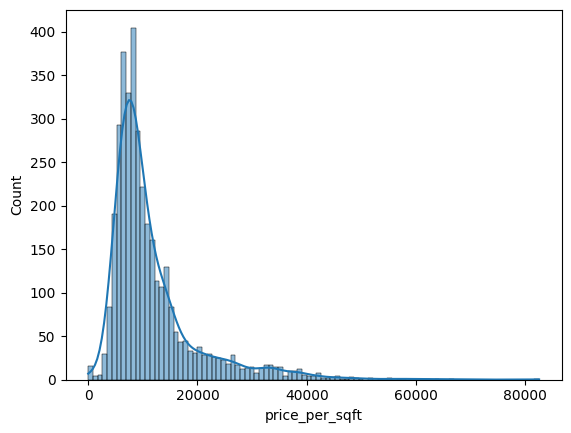

In [196]:
sns.histplot(df['price_per_sqft'],kde=True)

<AxesSubplot:xlabel='price_per_sqft'>

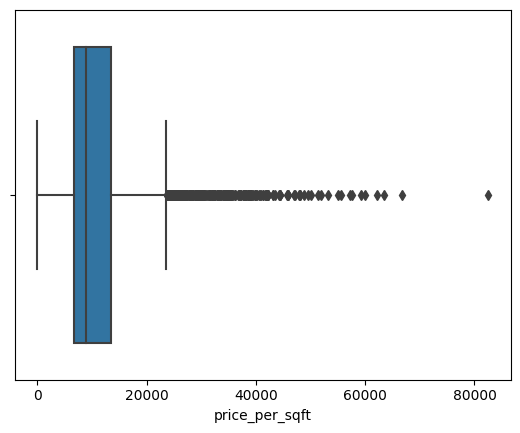

In [197]:
sns.boxplot(x=df['price_per_sqft'])

In [198]:
df[df['price_per_sqft']>50000]

property_type                       society           sector  price  \
52           house  project housing board colony        sector 31   8.00   
281          house                  malibu towne        sector 47   8.50   
617          house                   independent        sector 26  26.00   
1105         house                unitech escape        sector 50  10.80   
1215         house                dlf city plots        sector 26  26.00   
1315         house                           nul        sector 28  12.50   
1519         house                   independent        sector 26  14.75   
2748         house                   independent        sector 25  16.00   
3033         house        emaar the palm springs        sector 54  24.00   
3124          flat                unitech vistas        sector 70   9.00   
3249         house            emaar mgf marbella        sector 66  18.00   
3748         house            cloudnine cottages  sohna road road   5.50   
3764         house        emaar the palm springs        sector 54  14.00   

      price_per_sqft    area  \
52           63492.0  1260.0   
281          53125.0  1600.0   
617          82540.0  3150.0   
1105         60000.0  1800.0   
1215         57206.0  4545.0   
1315         51440.0  2430.0   
1519         51864.0  2844.0   
2748         59259.0  2700.0   
3033         66667.0  3600.0   
3124         57508.0  1565.0   
3249         55556.0  3240.0   
3748         55000.0  1000.0   
3764         62222.0  2250.0   

                                           areaWithType  bedRoom  bathroom  \
52                    Built Up area: 140 (117.06 sq.m.)      2.0       1.0   
281                  Built Up area: 1600 (148.64 sq.m.)     12.0      12.0   
617   Plot area 402(336.12 sq.m.)Built Up area: 400 ...     16.0      16.0   
1105  Plot area 290(242.48 sq.m.)Built Up area: 250 ...      4.0       4.0   
1215                        Plot area 505(422.24 sq.m.)      6.0       7.0   
1315                        Plot area 270(225.75 sq.m.)     16.0      17.0   
1519                        Plot area 316(264.22 sq.m.)     16.0      20.0   
2748  Plot area 350(292.64 sq.m.)Built Up area: 325 ...     16.0      16.0   
3033                         Plot area 400(37.16 sq.m.)      5.0       5.0   
3124                 Built Up area: 1565 (145.39 sq.m.)      3.0       3.0   
3249                        Plot area 360(301.01 sq.m.)      4.0       4.0   
3748                         Plot area 1000(92.9 sq.m.)      3.0       3.0   
3764                        Plot area 250(209.03 sq.m.)      4.0       5.0   

     balcony  floorNum      facing   agePossession  super_built_up_area  \
52         0       1.0         NaN       Undefined                  NaN   
281       3+       4.0       North    New Property                  NaN   
617       3+       4.0  North-West    New Property                  NaN   
1105       3       2.0       North  Relatively New                  NaN   
1215      3+       2.0  North-East    New Property                  NaN   
1315      3+       4.0       South  Relatively New                  NaN   
1519      3+       4.0        East    New Property                  NaN   
2748      3+       4.0        West    New Property                  NaN   
3033       2       1.0  North-East    Old Property                  NaN   
3124      No       7.0         NaN       Undefined                  NaN   
3249      3+       3.0        East  Moderately Old                  NaN   
3748       0       1.0         NaN  Moderately Old                  NaN   
3764      3+       2.0       North    Old Property                  NaN   

      built_up_area  carpet_area  servant room  pooja room  study room  \
52            140.0          NaN           0.0         0.0         0.0   
281          1600.0          NaN           0.0         0.0         0.0   
617           400.0        350.0           1.0         1.0         1.0   
1105          250.0        200.0           1.0     

In [199]:
df = df[df['price_per_sqft']<=50000]

In [200]:
df.shape

(3647, 23)

<AxesSubplot:xlabel='price_per_sqft'>

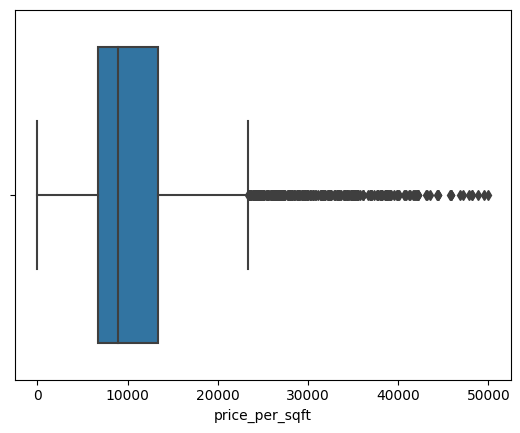

In [201]:
sns.boxplot(x=df['price_per_sqft'])

### Area

c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='area', ylabel='Density'>

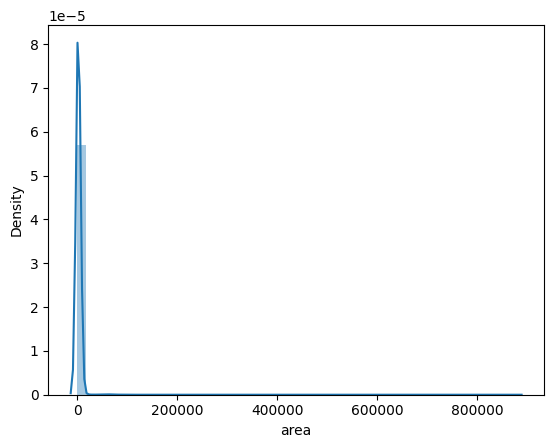

In [202]:
sns.distplot(df['area'])

In [203]:
df['area'].describe()

count      3647.000000
mean       2947.723608
std       23208.194102
min         145.000000
25%        1262.000000
50%        1750.000000
75%        2350.000000
max      875000.000000
Name: area, dtype: float64

<AxesSubplot:xlabel='area'>

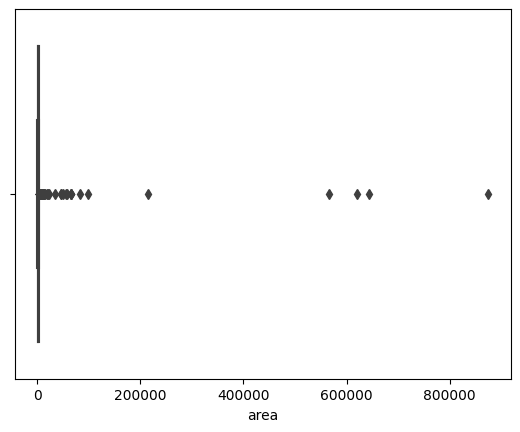

In [204]:
sns.boxplot(x=df['area'])

In [205]:
df[df['area']>100000]

property_type                    society      sector  price  \
445           flat  signature global solera 2  sector 107   0.51   
2018         house                independent   sector 50   5.00   
2852          flat          hcbs sports ville  sohna road   0.35   
2889          flat            ramsons kshitij   sector 95   0.31   
3723          flat      signature the roselia   sector 95   0.45   

      price_per_sqft      area                           areaWithType  \
445              9.0  566667.0   Carpet area: 514396 (47788.95 sq.m.)   
2018           232.0  215517.0             Plot area 2(1011.71 sq.m.)   
2852             4.0  875000.0  Built Up area: 737147 (68483.2 sq.m.)   
2889             5.0  620000.0    Carpet area: 607936 (56479.1 sq.m.)   
3723             7.0  642857.0   Carpet area: 569243 (52884.41 sq.m.)   

      bedRoom  bathroom balcony  floorNum      facing   agePossession  \
445       2.0       2.0       1       3.0       North    New Property   
2018      6.0       5.0      3+       2.0         NaN    New Property   
2852      2.0       2.0       2       8.0         NaN  Relatively New   
2889      2.0       2.0       1       1.0  North-East  Relatively New   
3723      2.0       2.0       2       2.0  South-West    New Property   

      super_built_up_area  built_up_area  carpet_area  servant room  \
445                   NaN            NaN     514396.0           0.0   
2018                  NaN            2.0          NaN           1.0   
2852                  NaN       737147.0          NaN           0.0   
2889                  NaN            NaN     607936.0           0.0   
3723                  NaN            NaN     569243.0           0.0   

      pooja room  study room  others  store room  furnishing_type  \
445          0.0         0.0     0.0         0.0              0.0   
2018         1.0         1.0     1.0         0.0              1.0   
2852         0.0         0.0     0.0         0.0              2.0   
2889         0.0         1.0     1.0         0.0              0.0   
3723         0.0         0.0     0.0         0.0              0.0   

      luxury_score  
445           48.0  
2018           0.0  
2852          48.0  
2889          78.0  
3723         106.0

In [206]:
df = df[df['area']<100000]

In [207]:
df.shape

(3642, 23)

<AxesSubplot:xlabel='area', ylabel='Count'>

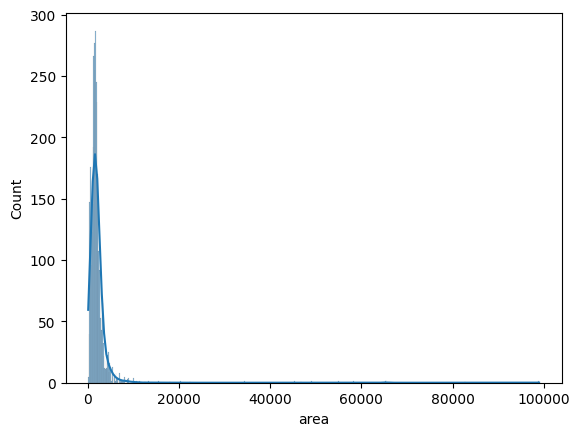

In [208]:
sns.histplot(df['area'],kde=True)

<AxesSubplot:xlabel='area'>

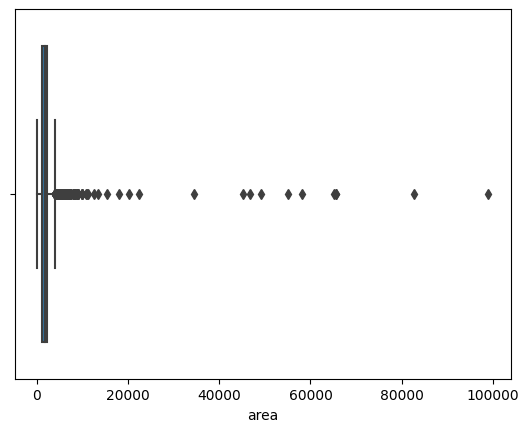

In [209]:
sns.boxplot(x=df['area'])

In [210]:
df[df['area']>10000].sort_values('price',ascending=False)

property_type                    society           sector  price  \
133          house                independent        sector 43  27.50   
1401         house                independent        sector 26  18.40   
1759          flat             m3m golfestate        sector 65  13.20   
730          house      dlf city plot phase 4        sector 28  13.00   
1858         house                independent        sector 25   7.30   
2278         house       unitech aspen greens        sector 50   6.95   
2262         house                independent        sector 57   6.25   
2616         house                independent  sohna road road   5.50   
2714         house                independent        sector 43   5.50   
1870          flat                 godrej air        sector 85   2.50   
909           flat                godrej icon       sector 88a   1.75   
2862         house  ganpati heights apartment        sector 13   1.25   
298          house                independent         sector 4   0.85   
3061          flat              pyramid elite        sector 86   0.46   
2710          flat                 rof ananda        sector 95   0.38   
2919          flat                 rof ananda        sector 95   0.38   
1796          flat                 rof ananda        sector 95   0.33   
2953          flat      signature the serenas       sohna road   0.28   
3154          flat            ramsons kshitij        sector 95   0.24   
3346          flat                 rof ananda        sector 95   0.21   

      price_per_sqft     area  \
133          24366.0  11286.0   
1401          1859.0  98978.0   
1759         12000.0  11000.0   
730           1992.0  65261.0   
1858          1560.0  46795.0   
2278          4490.0  15479.0   
2262          2778.0  22498.0   
2616          5093.0  10799.0   
2714          2716.0  20250.0   
1870          1379.0  18129.0   
909           1384.0  12645.0   
2862           151.0  82781.0   
298            630.0  13492.0   
3061            79.0  58228.0   
2710            58.0  65517.0   
2919            58.0  65517.0   
1796            60.0  55000.0   
2953            57.0  49123.0   
3154            53.0  45283.0   
3346            61.0  34426.0   

                                           areaWithType  bedRoom  bathroom  \
133                        Plot area 1254(1048.5 sq.m.)      6.0       7.0   
1401  Plot area 502(419.74 sq.m.)Carpet area: 11000 ...      6.0       8.0   
1759                 Carpet area: 11000 (1021.93 sq.m.)      4.0       4.0   
730                   Carpet area: 7250 (6061.92 sq.m.)     10.0      10.0   
1858  Plot area 215(179.77 sq.m.)Built Up area: 5800...      9.0       9.0   
2278  Plot area 240(200.67 sq.m.)Built Up area: 2160...      3.0       3.0   
2262  Plot area 3100(2591.99 sq.m.)Built Up area: 26...      9.0       9.0   
2616  Plot area 1200(1003.35 sq.m.)Built Up area: 35...      3.0       3.0   
2714  Plot area 215(179.77 sq.m.)Built Up area: 2850...      8.0       7.0   
1870                 Carpet area: 18122 (1683.59 sq.m.)      4.0       5.0   
909                                Carpet area: 1175.11      3.0       3.0   
2862                       Plot area 115(7692.86 sq.m.)     10.0       6.0   
298                       Plot area 1500(1254.19 sq.m.)      3.0       3.0   
3061                 Carpet area: 58141 (5401.48 sq.m.)      2.0       2.0   
2710                 Carpet area: 64412 (5984.07 sq.m.)      3.0       2.0   
2919                 Carpet area: 64529 (5994.94 sq.m.)      2.0       2.0   
1796                 Carpet area: 54917 (5101.96 sq.m.)      2.0       2.0   
2953                 Carpet area: 48811 (4534.69 sq.m.)      1.0       1.0   
3154                 Carpet area: 45966 (4270.38 sq.m.)      2.0       2.0   
3346                 Carpet area: 34401 (3195.96 sq.m.)      1.0       1.0   

     balcony  floorNum      facing       agePossession  super_built_up_area  \
133       3+       3.0  North-East      Relatively New     

In [211]:
df.drop(index=[1401,2710,2919,3061,1796,2953,3154,3346,298],inplace=True)

In [212]:
df.shape

(3633, 23)

In [213]:
df[df['area']>10000]

property_type                    society           sector  price  \
133          house                independent        sector 43  27.50   
730          house      dlf city plot phase 4        sector 28  13.00   
909           flat                godrej icon       sector 88a   1.75   
1759          flat             m3m golfestate        sector 65  13.20   
1858         house                independent        sector 25   7.30   
1870          flat                 godrej air        sector 85   2.50   
2262         house                independent        sector 57   6.25   
2278         house       unitech aspen greens        sector 50   6.95   
2616         house                independent  sohna road road   5.50   
2714         house                independent        sector 43   5.50   
2862         house  ganpati heights apartment        sector 13   1.25   

      price_per_sqft     area  \
133          24366.0  11286.0   
730           1992.0  65261.0   
909           1384.0  12645.0   
1759         12000.0  11000.0   
1858          1560.0  46795.0   
1870          1379.0  18129.0   
2262          2778.0  22498.0   
2278          4490.0  15479.0   
2616          5093.0  10799.0   
2714          2716.0  20250.0   
2862           151.0  82781.0   

                                           areaWithType  bedRoom  bathroom  \
133                        Plot area 1254(1048.5 sq.m.)      6.0       7.0   
730                   Carpet area: 7250 (6061.92 sq.m.)     10.0      10.0   
909                                Carpet area: 1175.11      3.0       3.0   
1759                 Carpet area: 11000 (1021.93 sq.m.)      4.0       4.0   
1858  Plot area 215(179.77 sq.m.)Built Up area: 5800...      9.0       9.0   
1870                 Carpet area: 18122 (1683.59 sq.m.)      4.0       5.0   
2262  Plot area 3100(2591.99 sq.m.)Built Up area: 26...      9.0       9.0   
2278  Plot area 240(200.67 sq.m.)Built Up area: 2160...      3.0       3.0   
2616  Plot area 1200(1003.35 sq.m.)Built Up area: 35...      3.0       3.0   
2714  Plot area 215(179.77 sq.m.)Built Up area: 2850...      8.0       7.0   
2862                       Plot area 115(7692.86 sq.m.)     10.0       6.0   

     balcony  floorNum      facing       agePossession  super_built_up_area  \
133       3+       3.0  North-East      Relatively New                  NaN   
730       3+       1.0         NaN           Undefined                  NaN   
909       3+       6.0         NaN        New Property                  NaN   
1759       3      13.0       North      Moderately Old                  NaN   
1858       2       3.0  North-West      Relatively New                  NaN   
1870      3+      16.0  North-East  Under Construction                  NaN   
2262      3+       3.0  North-East        New Property                  NaN   
2278       1       2.0  North-East      Moderately Old                  NaN   
2616      3+       2.0        West      Moderately Old                  NaN   
2714      3+       3.0        East      Moderately Old                  NaN   
2862       2       3.0  South-East        Old Property                  NaN   

      built_up_area  carpet_area  servant room  pooja room  study room  \
133         11286.0          NaN           1.0         1.0         1.0   
730             NaN      7250.00           0.0         0.0         0.0   
909             NaN      1175.11           0.0         0.0         0.0   
1759            NaN     11000.00           1.0         0.0         0.0   
1858         5800.0      5200.00           1.0         0.0         0.0   
1870            NaN     18122.00           0.0         1.0         1.0   
2262         2660.0      2500.00           1.0         0.0         0.0   
2278         2160.0      1720.00           1.0         0.0         0.0   
2616         3500.0          NaN           1.0         1.0         1.0   
2714         2850.0      2250.00           1.0         1.0         1.0   
2862          115.0          Na

In [214]:
df.loc[2862,'area'] = 115*9
df.loc[730,'area'] = 7250
df.loc[1858,'area'] = 5800
df.loc[2262,'area'] = 2660
df.loc[2714,'area'] = 2850
df.loc[1870,'area'] = 1812
df.loc[2278,'area'] = 2160
df.loc[909,'area'] = 1175

<AxesSubplot:xlabel='area', ylabel='Count'>

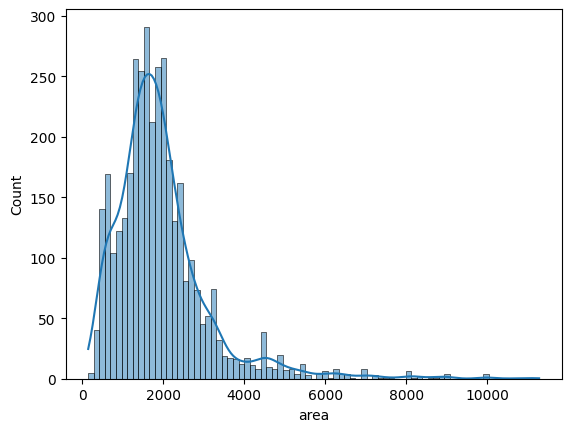

In [215]:
sns.histplot(df['area'],kde=True)

<AxesSubplot:xlabel='area'>

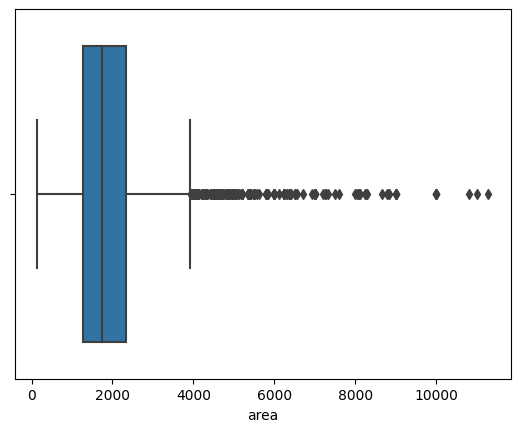

In [216]:
sns.boxplot(x=df['area'])

### Bedroom

<AxesSubplot:xlabel='bedRoom', ylabel='Count'>

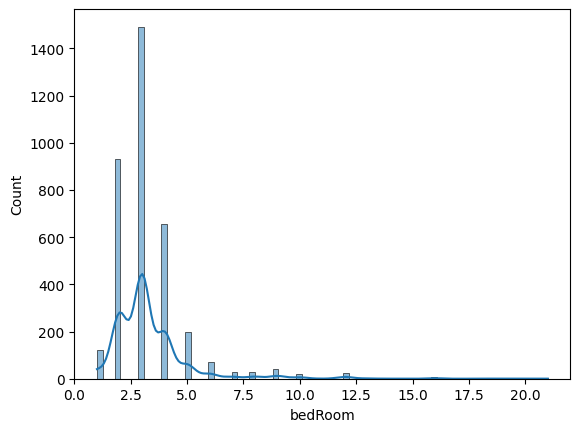

In [217]:
sns.histplot(df['bedRoom'],kde=True)

<AxesSubplot:xlabel='bedRoom'>

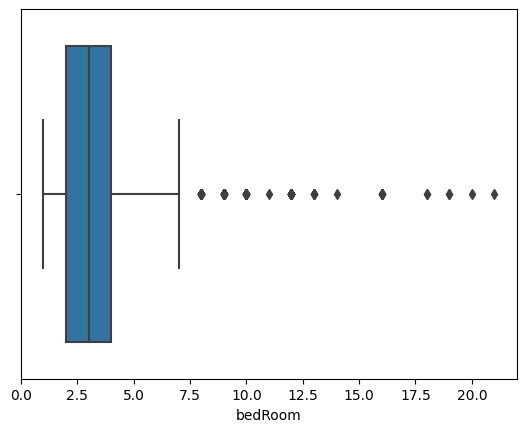

In [218]:
sns.boxplot(x=df['bedRoom'])

In [219]:
df[df['bedRoom']>10].sort_values('bedRoom',ascending=False)

property_type                      society      sector  price  \
3536         house                  independent   sector 54   5.00   
1376         house                  independent   sector 43   4.50   
3683         house                  independent  sector 17a   3.87   
463          house                  independent  sector 17a   3.93   
351          house                  independent   sector 54   5.50   
1564         house                private house   sector 55   7.05   
1300         house               dlf city plots   sector 26  20.00   
3174         house                  independent   sector 56  12.39   
114          house       luxury dlf city floors   sector 26  20.00   
1595         house                  independent   sector 55   9.19   
3760         house                  independent   sector 11   4.50   
2846         house                  independent   sector 43  13.50   
458          house                  independent   sector 40  12.00   
2523         house                  independent   sector 24   3.20   
3524         house          huda plot sector 38   sector 38   4.30   
1754         house                  independent  sector 104   0.80   
675          house       dlf city plots phase 3   sector 24   5.00   
2163         house                  independent   sector 28  11.00   
3136         house                  independent   sector 57   6.95   
3727         house       laxmi garden sector-11   sector 11   1.50   
3247         house                  independent   sector 47   6.09   
3337         house                  independent   sector 56  11.50   
3576         house                  independent   sector 13   0.50   
3438         house                  independent   sector 26   8.49   
3511         house               uppal southend   sector 49   6.75   
3654         house       luxury dlf city floors   sector 26   8.25   
3071         house                  independent   sector 26  10.50   
3614         house                  independent   sector 43   3.00   
3371         house               uppal southend   sector 49   6.75   
80           house    floor wise designer kothi   sector 25  13.00   
2746         house                  independent   sector 55   7.49   
2741         house                  independent   sector 14   8.00   
2572         house                  independent   sector 43   7.50   
2384         house                  independent   sector 27   8.25   
2069         house                  independent   sector 31   9.25   
1888         house                  independent   sector 46   6.81   
1835         house                  independent   sector 40   9.50   
1583         house               uppal southend   sector 49   6.75   
1055         house       dlf city plots phase 2   sector 25  10.00   
552          house                  independent   sector 43   2.20   
515          house                  independent   sector 46   6.50   
379          house  independent house sector 45   sector 40   9.00   
120          house                  independent   sector 56  11.95   
2164         house             dlf city phase 1   sector 26   9.25   
1586         house                  independent   sector 43   2.25   

      price_per_sqft    area  \
3536         43066.0  1161.0   
1376         39062.0  1152.0   
3683          5160.0  7500.0   
463          24214.0  1623.0   
351          38194.0  1440.0   
1564         46906.0  1503.0   
1300         44267.0  4518.0   
3174         45889.0  2700.0   
114          48888.0  4091.0   
1595         34037.0  2700.0   
3760         25000.0  1800.0   
2846         50000.0  2700.0   
458          38986.0  3078.0   
2523          6584.0  4860.0   
3524         27302.0  1575.0   
1754          8889.0   900.0   
675          34083.0  1467.0   
2163         33951.0  3240.0   
3136         38611.0  1800.0   
3727         12820.0  1170.0   
3247         33665.0  1809.0   
3337         42032.0  2736.0   
3576         10101.0   495.0   
3438         471

In [220]:
df = df[df['bedRoom']<=10]

In [221]:
df.shape

(3588, 23)

<AxesSubplot:xlabel='bedRoom', ylabel='Count'>

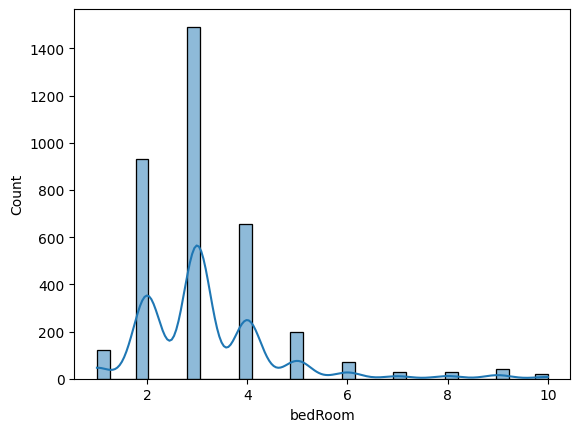

In [222]:
sns.histplot(df['bedRoom'],kde=True)

<AxesSubplot:xlabel='bedRoom'>

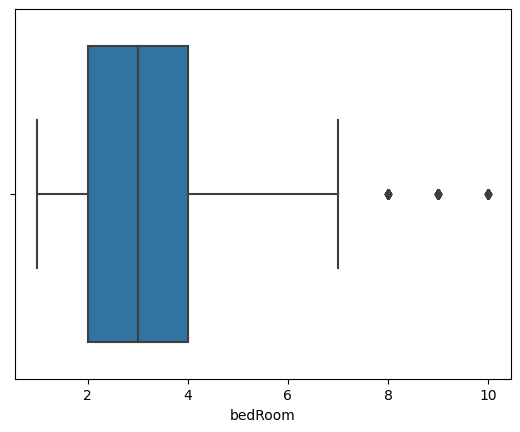

In [223]:
sns.boxplot(x=df['bedRoom'])

### Bathroom

<AxesSubplot:xlabel='bathroom', ylabel='Count'>

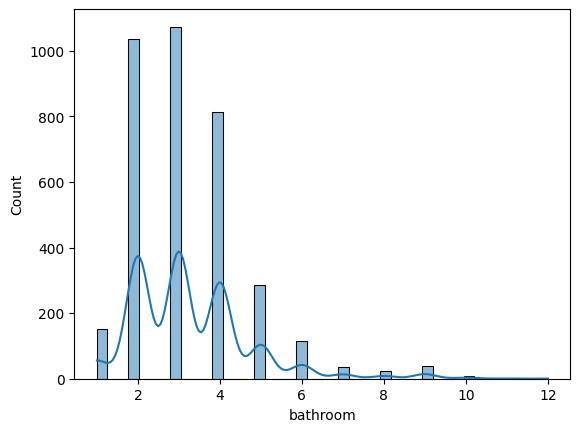

In [226]:
sns.histplot(df['bathroom'],kde=True)

<AxesSubplot:xlabel='bathroom'>

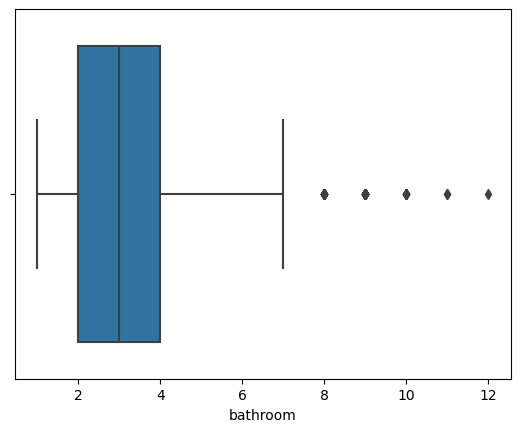

In [227]:
sns.boxplot(x=df['bathroom'])

In [229]:
df[df['bathroom']>10].sort_values('bathroom',ascending=True)

property_type               society     sector  price  price_per_sqft  \
1004         house           independent  sector 24  11.00         28902.0   
1151         house           independent  sector 39   7.00         10000.0   
3619         house  adani brahma samsara  sector 60  18.02         28200.0   

        area                                       areaWithType  bedRoom  \
1004  3806.0  Plot area 3806.45(353.63 sq.m.)Built Up area: ...      8.0   
1151  7000.0  Plot area 350(32.52 sq.m.)Built Up area: 7000 ...     10.0   
3619  6390.0                 Built Up area: 6390 (593.65 sq.m.)      9.0   

      bathroom balcony  floorNum      facing   agePossession  \
1004      11.0      3+       3.0        East    Old Property   
1151      11.0      3+       4.0  South-East  Relatively New   
3619      12.0      3+       3.0  North-East  Relatively New   

      super_built_up_area  built_up_area  carpet_area  servant room  \
1004                  NaN         5000.0          NaN           1.0   
1151                  NaN         7000.0          NaN           0.0   
3619                  NaN         6390.0          NaN           1.0   

      pooja room  study room  others  store room  furnishing_type  \
1004         1.0         1.0     1.0         0.0              1.0   
1151         1.0         0.0     0.0         0.0              2.0   
3619         0.0         0.0     0.0         0.0              1.0   

      luxury_score  
1004          39.0  
1151          38.0  
3619         179.0

### Super Built up Area

In [230]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<AxesSubplot:xlabel='super_built_up_area', ylabel='Count'>

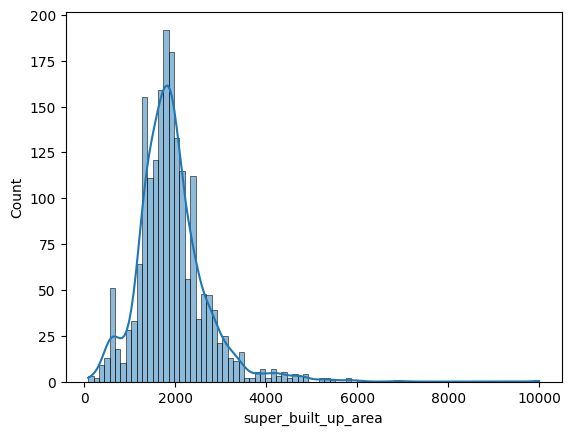

In [231]:
sns.histplot(df['super_built_up_area'],kde=True)

<AxesSubplot:xlabel='super_built_up_area'>

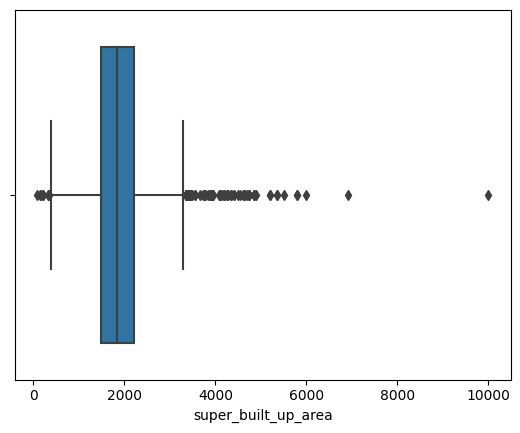

In [233]:
sns.boxplot(x=df['super_built_up_area'])

In [234]:
df[df['super_built_up_area']>6000]

property_type                      society       sector  price  \
1344          flat       krrish provence estate  gwal pahari    7.5   
2220          flat  bestech park view grand spa    sector 81    4.7   

      price_per_sqft     area                             areaWithType  \
1344          7500.0  10000.0  Super Built up area 10000(929.03 sq.m.)   
2220          6786.0   6926.0   Super Built up area 6926(643.45 sq.m.)   

      bedRoom  bathroom balcony  floorNum      facing   agePossession  \
1344      5.0       6.0      3+      23.0  North-East  Relatively New   
2220      4.0       4.0      3+      19.0       North  Relatively New   

      super_built_up_area  built_up_area  carpet_area  servant room  \
1344              10000.0            NaN          NaN           1.0   
2220               6926.0            NaN          NaN           1.0   

      pooja room  study room  others  store room  furnishing_type  \
1344         1.0         0.0     1.0         0.0              0.0   
2220         0.0         0.0     0.0         0.0              1.0   

      luxury_score  
1344          53.0  
2220         188.0

### Built up area

In [235]:
df['built_up_area'].describe()

count     1613.000000
mean      1938.088673
std       1398.149189
min         14.000000
25%       1120.000000
50%       1650.000000
75%       2385.000000
max      11286.000000
Name: built_up_area, dtype: float64

<AxesSubplot:xlabel='built_up_area', ylabel='Count'>

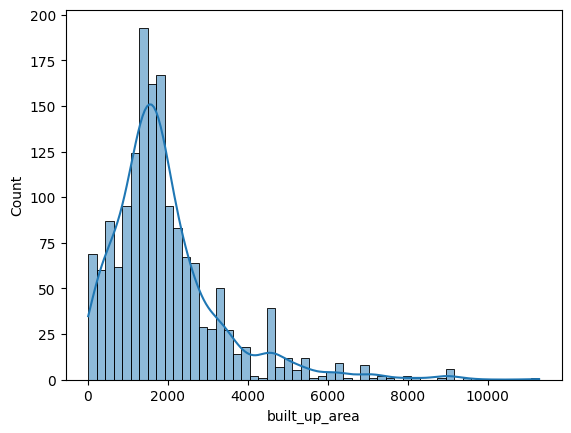

In [236]:
sns.histplot(df['built_up_area'],kde=True)

<AxesSubplot:xlabel='built_up_area'>

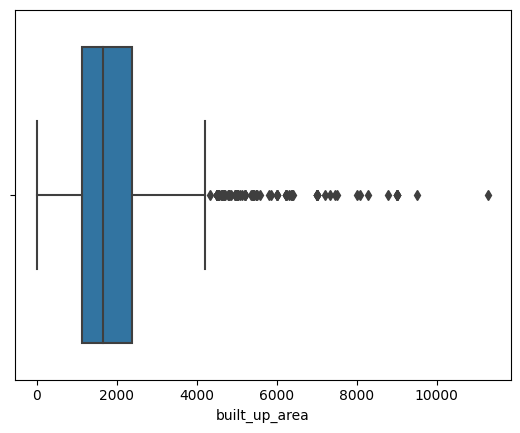

In [237]:
sns.boxplot(x=df['built_up_area'])

In [238]:
df[df['built_up_area']>10000]

property_type      society     sector  price  price_per_sqft     area  \
133         house  independent  sector 43   27.5         24366.0  11286.0   

                     areaWithType  bedRoom  bathroom balcony  floorNum  \
133  Plot area 1254(1048.5 sq.m.)      6.0       7.0      3+       3.0   

         facing   agePossession  super_built_up_area  built_up_area  \
133  North-East  Relatively New                  NaN        11286.0   

     carpet_area  servant room  pooja room  study room  others  store room  \
133          NaN           1.0         1.0         1.0     1.0         0.0   

     furnishing_type  luxury_score  
133              1.0          47.0

### Carpet area

In [239]:
df['carpet_area'].describe()

count     1850.000000
mean      1433.470204
std       1041.839596
min         15.000000
25%        845.000000
50%       1300.000000
75%       1764.797500
max      18122.000000
Name: carpet_area, dtype: float64

<AxesSubplot:xlabel='carpet_area', ylabel='Count'>

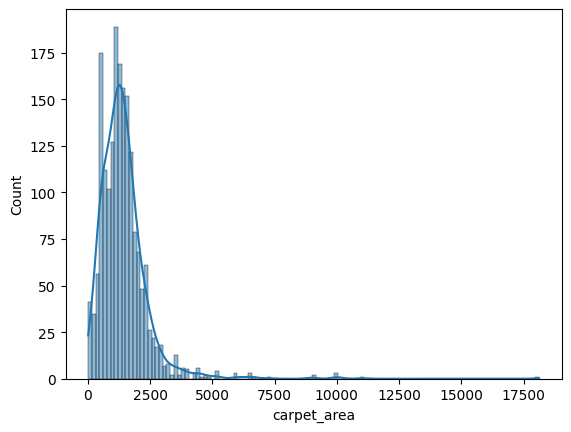

In [240]:
sns.histplot(df['carpet_area'],kde=True)

<AxesSubplot:xlabel='carpet_area'>

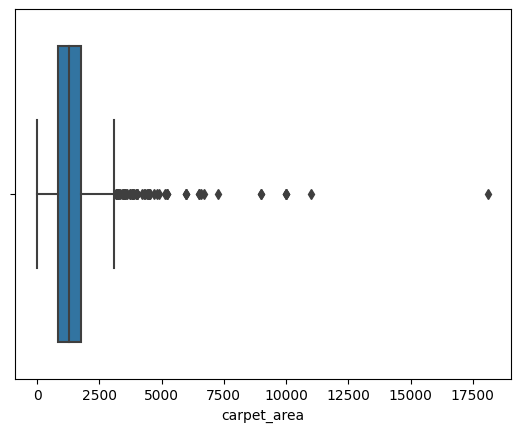

In [241]:
sns.boxplot(x=df['carpet_area'])

In [242]:
df[df['carpet_area']>10000]

property_type         society     sector  price  price_per_sqft     area  \
1759          flat  m3m golfestate  sector 65   13.2         12000.0  11000.0   
1870          flat      godrej air  sector 85    2.5          1379.0   1812.0   

                            areaWithType  bedRoom  bathroom balcony  floorNum  \
1759  Carpet area: 11000 (1021.93 sq.m.)      4.0       4.0       3      13.0   
1870  Carpet area: 18122 (1683.59 sq.m.)      4.0       5.0      3+      16.0   

          facing       agePossession  super_built_up_area  built_up_area  \
1759       North      Moderately Old                  NaN            NaN   
1870  North-East  Under Construction                  NaN            NaN   

      carpet_area  servant room  pooja room  study room  others  store room  \
1759      11000.0           1.0         0.0         0.0     0.0         0.0   
1870      18122.0           0.0         1.0         1.0     1.0         0.0   

      furnishing_type  luxury_score  
1759              0.0          77.0  
1870              1.0          48.0

In [243]:
df.loc[1870,'carpet_area'] = 1812

In [244]:
df[df['carpet_area']>10000]

property_type         society     sector  price  price_per_sqft     area  \
1759          flat  m3m golfestate  sector 65   13.2         12000.0  11000.0   

                            areaWithType  bedRoom  bathroom balcony  floorNum  \
1759  Carpet area: 11000 (1021.93 sq.m.)      4.0       4.0       3      13.0   

     facing   agePossession  super_built_up_area  built_up_area  carpet_area  \
1759  North  Moderately Old                  NaN            NaN      11000.0   

      servant room  pooja room  study room  others  store room  \
1759           1.0         0.0         0.0     0.0         0.0   

      furnishing_type  luxury_score  
1759              0.0          77.0

<AxesSubplot:xlabel='carpet_area', ylabel='Count'>

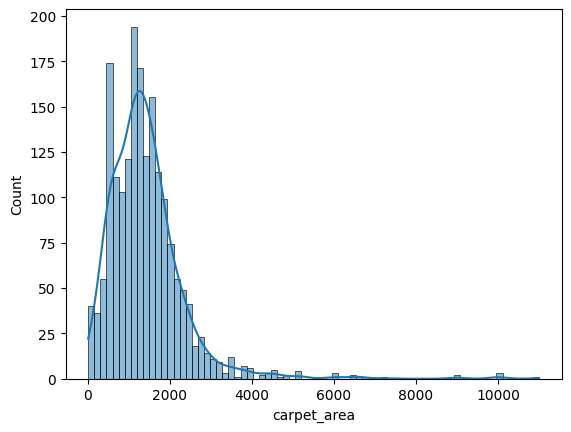

In [245]:
sns.histplot(df['carpet_area'],kde=True)

<AxesSubplot:xlabel='carpet_area'>

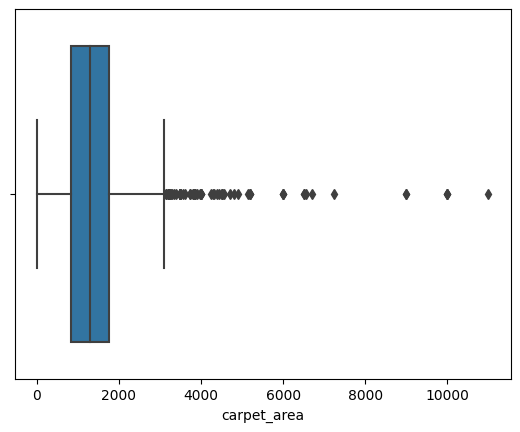

In [246]:
sns.boxplot(x=df['carpet_area'])

### Luxury Score

In [247]:
df['luxury_score'].describe()

count    3588.000000
mean       89.980491
std        69.092215
min         0.000000
25%        39.000000
50%        70.000000
75%       141.000000
max       228.000000
Name: luxury_score, dtype: float64

<AxesSubplot:xlabel='luxury_score', ylabel='Count'>

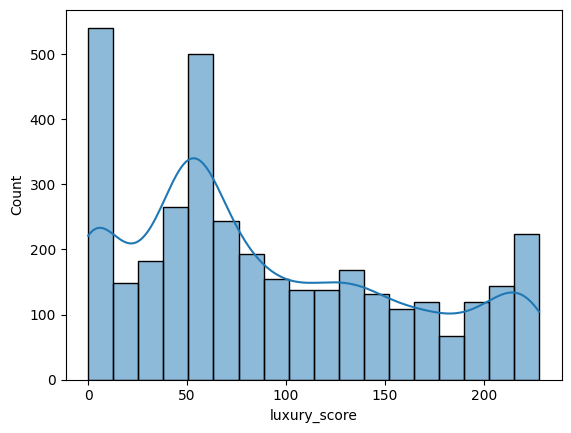

In [248]:
sns.histplot(df['luxury_score'],kde=True)

<AxesSubplot:xlabel='luxury_score'>

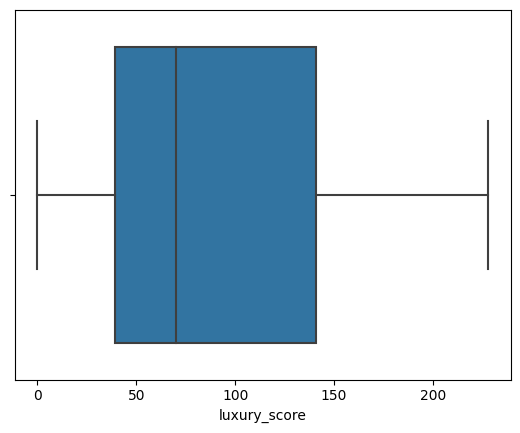

In [249]:
sns.boxplot(x=df['luxury_score'])

In [250]:
df.shape

(3588, 23)

In [251]:
df['price_per_sqft'] = round((df['price']*10000000)/(df['area']))

In [252]:
df.head()

property_type                  society      sector  price  price_per_sqft  \
0          flat          eldeco accolade  sohna road   0.73          5753.0   
1          flat        dlf regal gardens   sector 90   1.29          9021.0   
2          flat            m3m woodshire  sector 107   0.75          5490.0   
3          flat  adani m2k oyster grande  sector 102   2.50          7817.0   
4          flat            pyramid urban  sector 67a   0.60          8571.0   

     area                                       areaWithType  bedRoom  \
0  1269.0             Super Built up area 1269(117.89 sq.m.)      2.0   
1  1430.0  Super Built up area 1702(158.12 sq.m.)Built Up...      3.0   
2  1366.0  Super Built up area 1366(126.91 sq.m.)Carpet a...      2.0   
3  3198.0  Super Built up area 3198(297.1 sq.m.)Built Up ...      4.0   
4   700.0               Super Built up area 700(65.03 sq.m.)      2.0   

   bathroom balcony  floorNum      facing   agePossession  \
0       2.0       3       9.0  North-East  Relatively New   
1       3.0       3       7.0        East  Relatively New   
2       2.0      3+      14.0        West  Relatively New   
3       5.0      3+      10.0  North-East  Relatively New   
4       2.0       2      14.0         NaN    New Property   

   super_built_up_area  built_up_area  carpet_area  servant room  pooja room  \
0               1269.0            NaN          NaN           0.0         1.0   
1               1702.0         1540.0       1430.0           0.0         0.0   
2               1366.0            NaN       1050.0           0.0         1.0   
3               3198.0         2600.0       2350.0           1.0         1.0   
4                700.0            NaN          NaN           0.0         0.0   

   study room  others  store room  furnishing_type  luxury_score  
0         0.0     0.0         0.0              0.0         133.0  
1         1.0     0.0         0.0              0.0         224.0  
2         0.0     0.0         0.0              0.0         228.0  
3         0.0     0.0         0.0              1.0         228.0  
4         0.0     0.0         0.0              0.0          19.0

c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


<AxesSubplot:xlabel='price_per_sqft', ylabel='Density'>

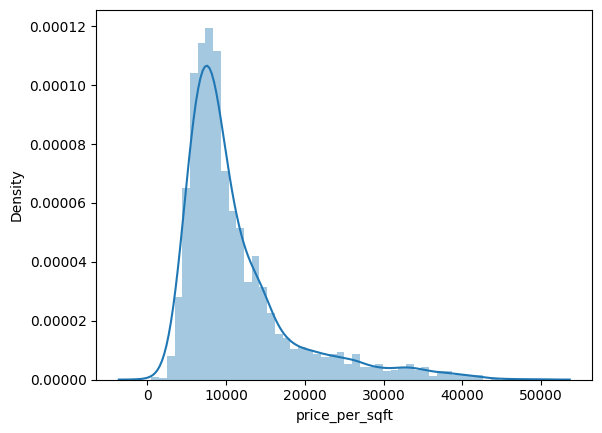

In [253]:
sns.distplot(df['price_per_sqft'],kde=True)

<AxesSubplot:xlabel='price_per_sqft'>

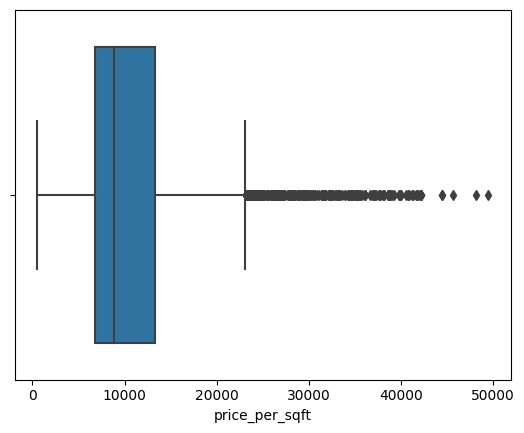

In [254]:
sns.boxplot(x=df['price_per_sqft'])

In [255]:
df[df['price_per_sqft']>40000]

property_type                       society      sector  price  \
128          house                dlf city plots   sector 26  19.00   
249           flat                 dlf the grove   sector 54   5.70   
290          house            emaar mgf marbella   sector 66   8.80   
549          house                   independent   sector 26  19.00   
644          house                unitech espace   sector 50  11.00   
773          house                   independent   sector 50  12.50   
892          house                unitech espace   sector 50   7.35   
1104         house                   independent   sector 26  18.90   
1802         house                   independent  sector 105   9.90   
1805         house  sushant lok 1 builder floors   sector 43  13.00   
1865         house                   independent   sector 28  11.75   
2462         house                   independent   sector 28  12.00   
2630         house                   independent   sector 25  13.00   
2860         house                   independent   sector 43   9.50   
3099         house                   independent   sector 55   5.00   
3144         house                   ss hibiscus   sector 50  12.50   
3797         house                   independent   sector 26  20.00   

      price_per_sqft    area  \
128          42054.0  4518.0   
249          41245.0  1382.0   
290          41608.0  2115.0   
549          42222.0  4500.0   
644          40741.0  2700.0   
773          40611.0  3078.0   
892          41761.0  1760.0   
1104         41833.0  4518.0   
1802         49500.0  2000.0   
1805         48148.0  2700.0   
1865         41315.0  2844.0   
2462         42194.0  2844.0   
2630         45710.0  2844.0   
2860         42222.0  2250.0   
3099         44444.0  1125.0   
3144         40850.0  3060.0   
3797         44444.0  4500.0   

                                           areaWithType  bedRoom  bathroom  \
128                         Plot area 502(419.74 sq.m.)      6.0       6.0   
249                  Built Up area: 1382 (128.39 sq.m.)      3.0       3.0   
290                   Built Up area: 267 (223.25 sq.m.)      4.0       4.0   
549                         Plot area 500(418.06 sq.m.)      6.0       8.0   
644   Plot area 360(301.01 sq.m.)Built Up area: 361 ...      4.0       4.0   
773                         Plot area 342(285.96 sq.m.)      6.0       5.0   
892                         Plot area 240(200.67 sq.m.)      4.0       4.0   
1104                        Plot area 502(419.74 sq.m.)      6.0       8.0   
1802  Built Up area: 2000 (185.81 sq.m.)Carpet area:...      2.0       2.0   
1805                        Plot area 300(250.84 sq.m.)      3.0       3.0   
1865                        Plot area 316(264.22 sq.m.)      4.0       5.0   
2462                        Plot area 316(264.22 sq.m.)      4.0       5.0   
2630                        Plot area 316(264.22 sq.m.)      6.0       8.0   
2860  Plot area 302(252.51 sq.m.)Built Up area: 300 ...      5.0       5.0   
3099  Plot area 125(104.52 sq.m.)Built Up area: 115 ...      9.0       9.0   
3144  Plot area 470(392.98 sq.m.)Built Up area: 410 ...      4.0       4.0   
3797                        Plot area 500(418.06 sq.m.)      5.0       7.0   

     balcony  floorNum      facing   agePossession  super_built_up_area  \
128        3       2.0        East  Relatively New                  NaN   
249        3       1.0        East       Undefined                  NaN   
290       3+       3.0  South-East  Relatively New                  NaN   
549       3+       3.0        East  Moderately Old                  NaN   
644       3+       2.0       North  Moderately Old                  NaN   
773        3       4.0        East  Moderately Old                  NaN   
892       3+       3.0       South  Moderately Old                  NaN   
1104       2       3.0  North-East  Relatively New                  NaN   
1802       2       3.0       North       Undefined                  N

In [262]:
x = df[df['price_per_sqft']<=20000]
(x['area']/x['bedRoom']).quantile(0.05)


250.5

In [263]:
df[df['area']/df['bedRoom']<250]

property_type                              society      sector  price  \
26           house                            row house  sector 105   0.43   
39           house                          independent  sector 105   1.10   
44           house                          independent   sector 17   3.50   
62           house                          independent  sector 105   0.55   
91           house                          independent   sector 13   1.50   
...            ...                                  ...         ...    ...   
3721          flat                        prime habitat  sector 99a   0.27   
3722         house                          independent   sector 12   2.50   
3726         house                          independent    sector 4   0.60   
3745         house  palam vihar extension west zone rwa    sector 2   0.40   
3771         house                          independent    sector 4   0.47   

      price_per_sqft    area  \
26            9130.0   471.0   
39           12222.0   900.0   
44           24306.0  1440.0   
62           10913.0   504.0   
91           11538.0  1300.0   
...              ...     ...   
3721          5433.0   497.0   
3722         13889.0  1800.0   
3726         11696.0   513.0   
3745          4444.0   900.0   
3771         10609.0   443.0   

                                           areaWithType  bedRoom  bathroom  \
26    Plot area 52(43.48 sq.m.)Built Up area: 1050 s...      3.0       3.0   
39                       Carpet area: 900 (83.61 sq.m.)      6.0       4.0   
44                     Built Up area: 160 (14.86 sq.m.)      6.0       6.0   
62                        Built Up area: 56 (5.2 sq.m.)      4.0       4.0   
91                         Plot area 1300(120.77 sq.m.)     10.0       7.0   
...                                                 ...      ...       ...   
3721                     Carpet area: 497 (46.17 sq.m.)      2.0       2.0   
3722                       Plot area 1800(167.23 sq.m.)      9.0       5.0   
3726                            Plot area 57(5.3 sq.m.)      3.0       3.0   
3745                         Plot area 900(83.61 sq.m.)      6.0       4.0   
3771  Plot area 49(40.97 sq.m.)Built Up area: 50 sq....      2.0       2.0   

     balcony  floorNum      facing   agePossession  super_built_up_area  \
26         3       2.0         NaN  Relatively New                  NaN   
39         1       1.0  South-West       Undefined                  NaN   
44        3+       3.0  North-West       Undefined                  NaN   
62         0       2.0         NaN       Undefined                  NaN   
91         3       4.0        East  Moderately Old                  NaN   
...      ...       ...         ...             ...                  ...   
3721       1       4.0  North-East    New Property                  NaN   
3722       2       1.0  South-East    Old Property                  NaN   
3726       1       2.0         NaN    Old Property                  NaN   
3745       2       2.0        West  Moderately Old                  NaN   
3771       1       2.0        East    New Property                  NaN   

      built_up_area  carpet_area  servant room  pooja room  study room  \
26           1050.0          NaN           0.0         0.0         0.0   
39              NaN        900.0           0.0         0.0         0.0   
44            160.0          NaN           0.0         0.0         0.0   
62             56.0          NaN           0.0         0.0         0.0   
91           1300.0          NaN           0.0         0.0         0.0   
...             ...          ...           ...         ...         ...   
3721            NaN        497.0           0.0         0.0         0.0   
3722         1800.0          NaN           0.0         1.0         0.0   
3726           57.0          NaN           0.0         0.0         0.0   
3745          900.0          NaN           0.0         0.0         0.0   
3771           50.0         48.

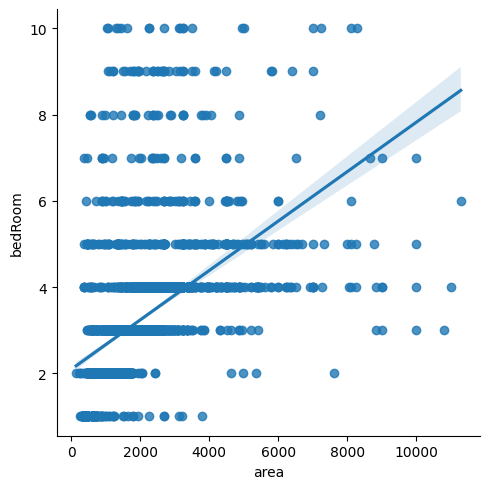

In [264]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [265]:
df['area_room_ratio'] = df['area']/df['bedRoom']

In [270]:
df[df['area_room_ratio']<250]['bedRoom'].value_counts()

2.0     47
3.0     33
5.0     28
6.0     17
4.0     17
9.0     15
8.0     12
10.0     8
7.0      8
Name: bedRoom, dtype: int64

In [272]:
df = df[df['area_room_ratio']>100]

In [277]:
outliers_df = df[(df['area_room_ratio']<250) & (df['bedRoom']>3)]

In [280]:
outliers_df['bedRoom'] = outliers_df['bedRoom']/outliers_df['floorNum']

c:\users\mukul\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [282]:
df.update(outliers_df)

In [283]:
df['area_room_ration'] = df['area']/df['bedRoom']

In [295]:
df[(df['area_room_ratio']<250) & (df['bedRoom']>4)]

property_type               society            sector  price  \
39           house           independent        sector 105   1.10   
522          house           independent           manesar   1.10   
571          house           independent  sector 3 phase 2   1.10   
1196         house           independent          sector 7   1.16   
1994         house           independent         sector 17   0.32   
2042         house  bhim nagar, sector 6          sector 6   0.85   
2829         house           independent          sector 2   0.98   
2865         house           independent         sector 11   3.50   
2984         house           independent  sector 3 phase 2   0.85   
3126         house           independent           manesar   0.80   
3252         house           independent         sector 12   0.65   
3278         house              shivpuri          sector 7   2.80   
3722         house           independent         sector 12   2.50   

      price_per_sqft    area  \
39           12222.0   900.0   
522           6173.0  1782.0   
571          10000.0  1100.0   
1196         11717.0   990.0   
1994          5664.0   565.0   
2042         14096.0   603.0   
2829          9074.0  1080.0   
2865         15556.0  2250.0   
2984          9444.0   900.0   
3126          6667.0  1200.0   
3252          6500.0  1000.0   
3278         12444.0  2250.0   
3722         13889.0  1800.0   

                                           areaWithType  bedRoom  bathroom  \
39                       Carpet area: 900 (83.61 sq.m.)      6.0       4.0   
522                        Plot area 1782(165.55 sq.m.)      8.0       8.0   
571   Built Up area: 1100 (102.19 sq.m.)Carpet area:...      5.0       4.0   
1196                     Carpet area: 110 (91.97 sq.m.)      5.0       4.0   
1994                   Built Up area: 565 (52.49 sq.m.)      5.0       1.0   
2042                           Plot area 67(6.22 sq.m.)      5.0       2.0   
2829                    Carpet area: 120 (100.34 sq.m.)      9.0       4.0   
2865                 Built Up area: 2250 (209.03 sq.m.)     10.0       1.0   
2984                     Carpet area: 900 (83.61 sq.m.)      5.0       3.0   
3126                       Plot area 1200(111.48 sq.m.)      8.0       8.0   
3252                     Carpet area: 1000 (92.9 sq.m.)      6.0       2.0   
3278                       Plot area 2250(209.03 sq.m.)     10.0       7.0   
3722                       Plot area 1800(167.23 sq.m.)      9.0       5.0   

     balcony  floorNum      facing   agePossession  super_built_up_area  \
39         1       1.0  South-West       Undefined                  NaN   
522        0       1.0         NaN    New Property                  NaN   
571        2       1.0        East       Undefined                  NaN   
1196       2       1.0  North-East       Undefined                  NaN   
1994       0       1.0         NaN       Undefined                  NaN   
2042       2       1.0         NaN    Old Property                  NaN   
2829       3       1.0       South       Undefined                  NaN   
2865       0       1.0         NaN    New Property                  NaN   
2984       3       1.0         NaN       Undefined                  NaN   
3126       2       1.0         NaN  Relatively New                  NaN   
3252       3       1.0         NaN       Undefined                  NaN   
3278       3       1.0         NaN    Old Property                  NaN   
3722       2       1.0  South-East    Old Property                  NaN   

      built_up_area  carpet_area  servant room  pooja room  study room  \
39              NaN        900.0           0.0         0.0         0.0   
522          1782.0          NaN           0.0         0.0         0.0   
571          1100.0        900.0           0.0         0.0         0.0   
1196            NaN        110.0           0.0         0.0         0.0   
1994          565.0          NaN           0.0         0.0         0.0   
2

In [288]:
df['bedRoom'] = round(df['bedRoom'])

In [302]:
df = df[~((df['area_room_ratio']<250) & (df['bedRoom']>4))]

In [303]:
df.shape

(3555, 25)

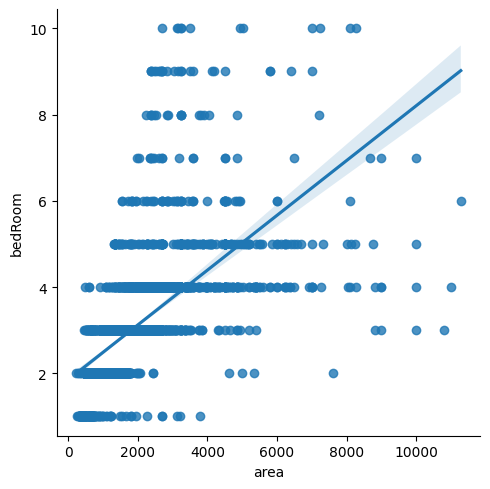

In [304]:
sns.lmplot(data=df,x='area',y='bedRoom')

In [305]:
df.to_csv('Gurgaon_properties_Outlier_treatment.csv')